# The Spark Foundation - GRIP'2024 - Data Science & Business Analytics
## Task : Exploratory Data Analysis - Retail SampleSuperstore
### Presented By : kanika Arya


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
data = pd.read_csv("SampleSuperstore.csv")

data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [4]:
# Summary statistics
print(data.describe())

        Postal Code         Sales     Quantity     Discount       Profit
count   9994.000000   9994.000000  9994.000000  9994.000000  9994.000000
mean   55190.379428    229.858001     3.789574     0.156203    28.656896
std    32063.693350    623.245101     2.225110     0.206452   234.260108
min     1040.000000      0.444000     1.000000     0.000000 -6599.978000
25%    23223.000000     17.280000     2.000000     0.000000     1.728750
50%    56430.500000     54.490000     3.000000     0.200000     8.666500
75%    90008.000000    209.940000     5.000000     0.200000    29.364000
max    99301.000000  22638.480000    14.000000     0.800000  8399.976000


In [5]:
# Check for missing values
print(data.isnull().sum())

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64


In [6]:
# Calculate total sales and total profit
total_sales = data['Sales'].sum()
total_profit = data['Profit'].sum()
print(f"Total Sales: {total_sales}, Total Profit: {total_profit}")

Total Sales: 2297200.8603000003, Total Profit: 286397.0217


In [7]:
# Sales and profit by category
category_analysis = data.groupby('Category').agg(Total_Sales=('Sales', 'sum'), Total_Profit=('Profit', 'sum'))
print(category_analysis)

                 Total_Sales  Total_Profit
Category                                  
Furniture        741999.7953    18451.2728
Office Supplies  719047.0320   122490.8008
Technology       836154.0330   145454.9481


In [8]:
# Sales and profit by sub-category
subcategory_analysis = data.groupby('Sub-Category').agg(Total_Sales=('Sales', 'sum'), Total_Profit=('Profit', 'sum'))
print(subcategory_analysis.sort_values(by='Total_Profit'))

              Total_Sales  Total_Profit
Sub-Category                           
Tables        206965.5320   -17725.4811
Bookcases     114879.9963    -3472.5560
Supplies       46673.5380    -1189.0995
Fasteners       3024.2800      949.5182
Machines      189238.6310     3384.7569
Labels         12486.3120     5546.2540
Art            27118.7920     6527.7870
Envelopes      16476.4020     6964.1767
Furnishings    91705.1640    13059.1436
Appliances    107532.1610    18138.0054
Storage       223843.6080    21278.8264
Chairs        328449.1030    26590.1663
Binders       203412.7330    30221.7633
Paper          78479.2060    34053.5693
Accessories   167380.3180    41936.6357
Phones        330007.0540    44515.7306
Copiers       149528.0300    55617.8249


In [9]:
# Analyzing the impact of discounts on profitability
discount_impact = data.groupby(['Category', 'Sub-Category']).agg(Average_Discount=('Discount', 'mean'),
                                                                  Total_Sales=('Sales', 'sum'),
                                                                  Total_Profit=('Profit', 'sum'))
print(discount_impact.sort_values(by=['Category', 'Total_Profit']))

                              Average_Discount  Total_Sales  Total_Profit
Category        Sub-Category                                             
Furniture       Tables                0.261285  206965.5320   -17725.4811
                Bookcases             0.211140  114879.9963    -3472.5560
                Furnishings           0.138349   91705.1640    13059.1436
                Chairs                0.170178  328449.1030    26590.1663
Office Supplies Supplies              0.076842   46673.5380    -1189.0995
                Fasteners             0.082028    3024.2800      949.5182
                Labels                0.068681   12486.3120     5546.2540
                Art                   0.074874   27118.7920     6527.7870
                Envelopes             0.080315   16476.4020     6964.1767
                Appliances            0.166524  107532.1610    18138.0054
                Storage               0.074704  223843.6080    21278.8264
                Binders               

In [10]:
# Geographical analysis by state
state_analysis = data.groupby('State').agg(Total_Sales=('Sales', 'sum'),
                                           Total_Profit=('Profit', 'sum')).sort_values(by='Total_Profit')
print(state_analysis.head(10))

                Total_Sales  Total_Profit
State                                    
Texas           170188.0458   -25729.3563
Ohio             78258.1360   -16971.3766
Pennsylvania    116511.9140   -15559.9603
Illinois         80166.1010   -12607.8870
North Carolina   55603.1640    -7490.9122
Colorado         32108.1180    -6527.8579
Tennessee        30661.8730    -5341.6936
Arizona          35282.0010    -3427.9246
Florida          89473.7080    -3399.3017
Oregon           17431.1500    -1190.4705


In [11]:
# Customer segment analysis
segment_analysis = data.groupby('Segment').agg(Total_Sales=('Sales', 'sum'),
                                                Total_Profit=('Profit', 'sum')).sort_values(by='Total_Profit')
print(segment_analysis)

              Total_Sales  Total_Profit
Segment                                
Home Office  4.296531e+05    60298.6785
Corporate    7.061464e+05    91979.1340
Consumer     1.161401e+06   134119.2092


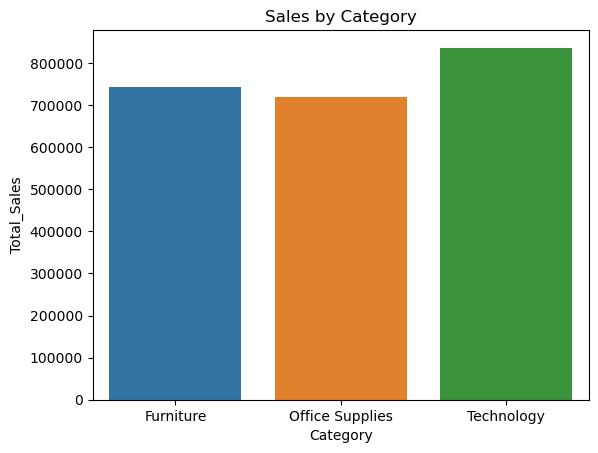

In [12]:
# Sales by category
sns.barplot(x='Category', y='Total_Sales', data=category_analysis.reset_index())
plt.title('Sales by Category')
plt.show()

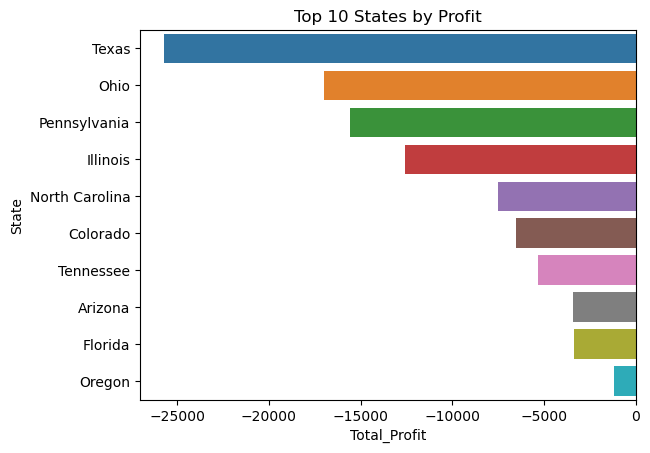

In [13]:
# Profit by state (top 10 negative profits)
top_10_states = state_analysis.head(10).reset_index()
sns.barplot(x='Total_Profit', y='State', data=top_10_states)
plt.title('Top 10 States by Profit')
plt.show()

In [14]:
# Top 5 Best-Selling Products
top_selling_products = data.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False).head(5)
print("Top 5 Best-Selling Products:")
print(top_selling_products)

Top 5 Best-Selling Products:
Sub-Category
Phones     330007.054
Chairs     328449.103
Storage    223843.608
Tables     206965.532
Binders    203412.733
Name: Sales, dtype: float64


In [15]:
# Top 5 Least-Selling Products
least_selling_products = data.groupby('Sub-Category')['Sales'].sum().sort_values().head(5)
print("\nTop 5 Least-Selling Products:")
print(least_selling_products)


Top 5 Least-Selling Products:
Sub-Category
Fasteners     3024.280
Labels       12486.312
Envelopes    16476.402
Art          27118.792
Supplies     46673.538
Name: Sales, dtype: float64


In [16]:
# Average Sales and Profit per Order
data['Order Profitability'] = data['Profit'] / data['Sales']
avg_sales_per_order = data['Sales'].mean()
avg_profit_per_order = data['Profit'].mean()
avg_order_profitability = data['Order Profitability'].mean()

print(f"Average Sales per Order: {avg_sales_per_order}")
print(f"Average Profit per Order: {avg_profit_per_order}")
print(f"Average Order Profitability: {avg_order_profitability}")

Average Sales per Order: 229.85800083049833
Average Profit per Order: 28.65689630778467
Average Order Profitability: 0.12031392972104459


In [17]:
# Analysis by Ship Mode
ship_mode_analysis = data.groupby('Ship Mode').agg(Total_Sales=('Sales', 'sum'),
                                                    Total_Profit=('Profit', 'sum'),
                                                    Avg_Delivery_Profitability=('Order Profitability', 'mean'))
print(ship_mode_analysis)

                 Total_Sales  Total_Profit  Avg_Delivery_Profitability
Ship Mode                                                             
First Class     3.514284e+05    48969.8399                    0.115948
Same Day        1.283631e+05    15891.7589                    0.138151
Second Class    4.591936e+05    57446.6354                    0.150209
Standard Class  1.358216e+06   164088.7875                    0.110073


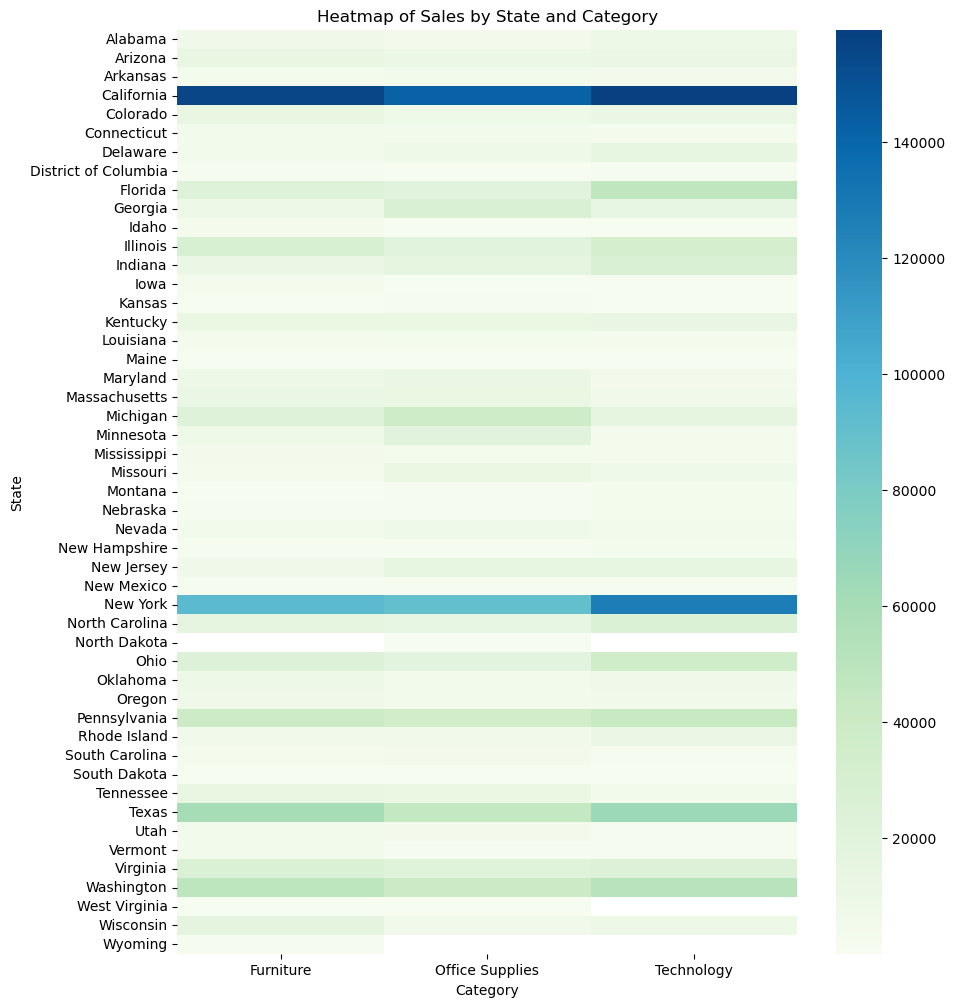

In [18]:
# Pivot table for Sales by State and Category
pivot_sales_state_category = pd.pivot_table(data, values='Sales', index='State', columns='Category', aggfunc='sum')

# Heatmap
plt.figure(figsize=(10, 12))
sns.heatmap(pivot_sales_state_category, cmap="GnBu")
plt.title('Heatmap of Sales by State and Category')
plt.show()

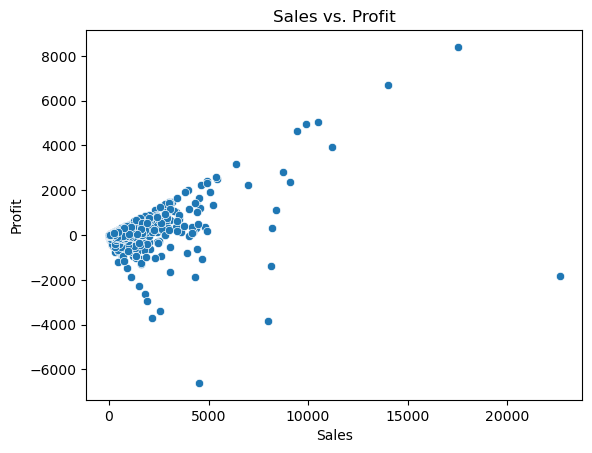

In [19]:
# Scatter plot of Sales vs. Profit
sns.scatterplot(x='Sales', y='Profit', data=data)
plt.title('Sales vs. Profit')
plt.show()

In [20]:
# List all numeric columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
print(numeric_columns)

Index(['Postal Code', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Order Profitability'],
      dtype='object')


In [21]:
# Calculate the correlation matrix for numeric columns only
correlation_matrix = data[numeric_columns].corr()

# Print the correlation with 'Profit', sorted
print(correlation_matrix['Profit'].sort_values(ascending=False))

Profit                 1.000000
Sales                  0.479064
Order Profitability    0.223732
Quantity               0.066253
Postal Code           -0.029961
Discount              -0.219487
Name: Profit, dtype: float64


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Selecting features and target variable
X = data[['Sales', 'Quantity', 'Discount']]
y = data['Profit']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

In [24]:
# Calculate the model's performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 83592.67395643327
R^2 Score: -0.7240890405096132


# Refining the Regression Analysis Based on Correlation Findings

Your correlation findings indicate:<br>
A moderate positive correlation between Sales and Profit (0.479064).<br>
A very weak positive correlation between Quantity and Profit (0.066253).<br>
A weak negative correlation between Discount and Profit (-0.219487).<br>
The negative R-squared value in the model's performance metrics suggests that the model fits the data worse than a horizontal line (i.e., a simple mean of the observed Profit). This outcome is highly unusual in practice and indicates that the model's assumptions or the selected features may not be appropriate for predicting Profit.

#### Given the weak correlation between Quantity and Profit, and considering the negative R-squared value, it's worth evaluating if excluding Quantity and focusing on Sales and Discount improves the model. Additionally, exploring non-linear relationships or interactions between features might be beneficial.

Next step involves developing a More Complex Model<br>
Given the potential non-linear relationship, let's explore a more complex model. Polynomial features for Sales and Discount could capture the non-linear effects on Profit.

In [25]:
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(data[['Sales', 'Discount']])

# Split the data
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Train the model
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)

# Predictions
y_pred_poly = model_poly.predict(X_test_poly)

In [26]:
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_poly))
print("R-squared (R2):", r2_score(y_test, y_pred_poly))

Mean Squared Error (MSE): 13764.973662110138
R-squared (R2): 0.7160990418117716


#### Polynomial Regression Model Improvement
After identifying the linear model's limitations, I applied a polynomial model that significantly improved the predictive accuracy for profit, showing an R-squared value of 0.716, suggesting that incorporating non-linear features could capture the complex dynamics affecting profitability more effectively.

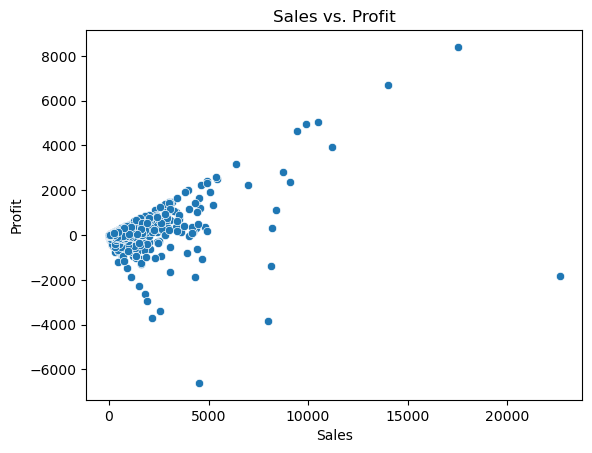

In [27]:
# Sales vs. Profit
sns.scatterplot(x='Sales', y='Profit', data=data)
plt.title('Sales vs. Profit')
plt.show()



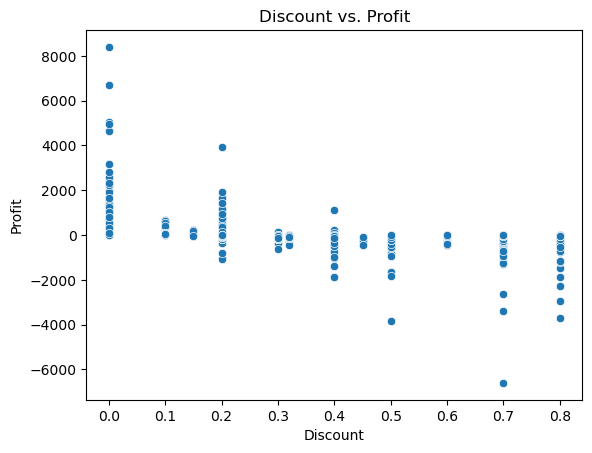

In [28]:
# Discount vs. Profit
sns.scatterplot(x='Discount', y='Profit', data=data)
plt.title('Discount vs. Profit')
plt.show()

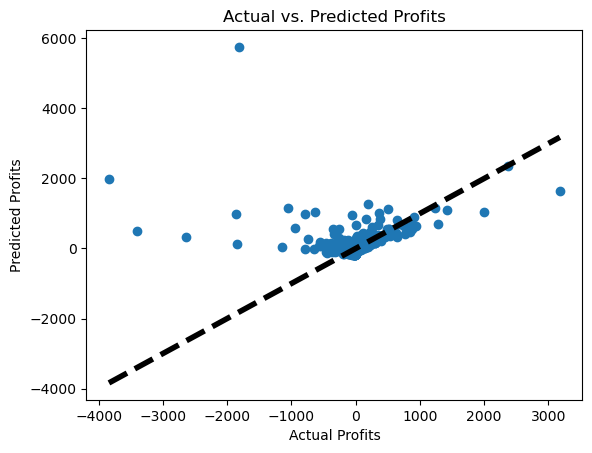

In [29]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Profits')
plt.ylabel('Predicted Profits')
plt.title('Actual vs. Predicted Profits')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.show()

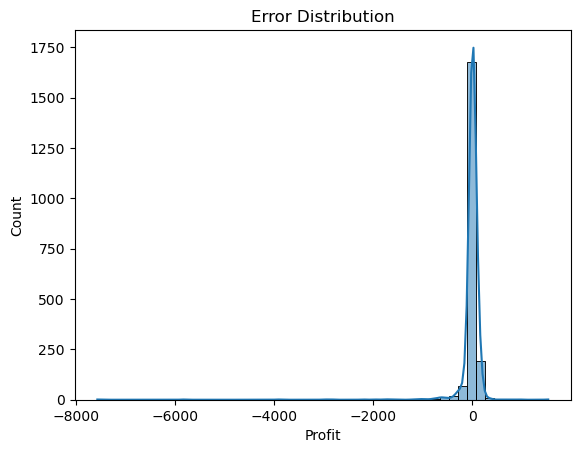

In [30]:
sns.histplot((y_test - y_pred), bins=50, kde=True)
plt.title('Error Distribution')
plt.show()

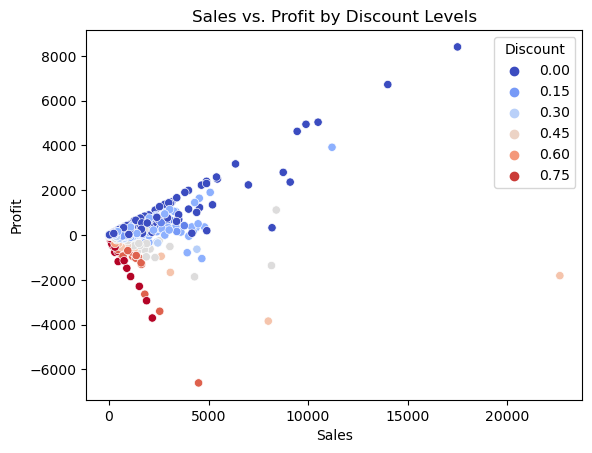

In [31]:
# Sales vs. Profit
sns.scatterplot(data=data, x='Sales', y='Profit', hue='Discount', palette="coolwarm")
plt.title('Sales vs. Profit by Discount Levels')
plt.show()

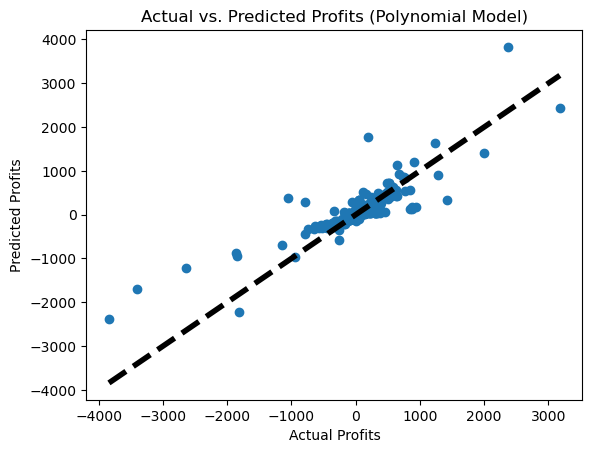

In [32]:
plt.scatter(y_test, y_pred_poly)
plt.xlabel('Actual Profits')
plt.ylabel('Predicted Profits')
plt.title('Actual vs. Predicted Profits (Polynomial Model)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.show()

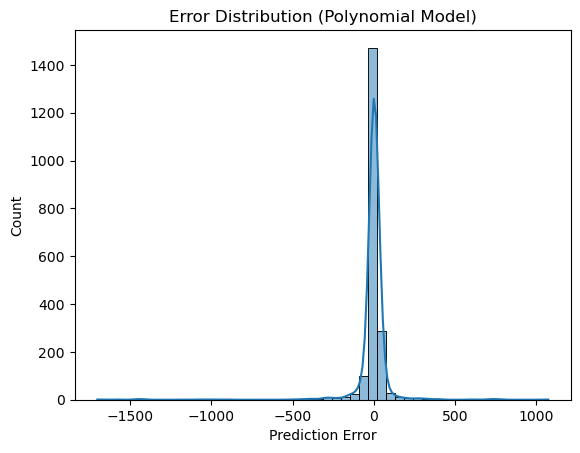

In [33]:
sns.histplot(y_test - y_pred_poly, bins=50, kde=True)
plt.title('Error Distribution (Polynomial Model)')
plt.xlabel('Prediction Error')
plt.show()

Based on the comprehensive analysis we conducted, including correlation analysis, linear regression, polynomial feature enhancement, and various data visualizations, let's synthesize the insights gained and formulate recommendations to increase profit for the Sample Superstore.

## Insights

1. Sales and Profit Correlation: There's a moderate positive correlation between Sales and Profit, indicating that higher sales generally lead to higher profits. However, this relationship isn't linear, as shown by the improved performance of the polynomial model.

2. Impact of Discounts: The negative correlation between Discount and Profit suggests that higher discounts may reduce profitability. The visualization of Sales vs. Profit by Discount levels further supports this, showing that higher discounts don't always correspond to increased profitability.

3. Sub-Category Performance: Certain sub-categories, like Tables and Bookcases, show negative profitability, which drags down the overall profit in the Furniture category. Conversely, sub-categories like Copiers in the Technology category are highly profitable.

4. Geographical Variations: The analysis by state revealed that some states, such as Texas and Ohio, are significantly less profitable than others. This suggests geographical market performance varies widely, possibly due to different competitive landscapes, market saturation, or operational inefficiencies.

5. Segment Analysis: Different customer segments exhibit different levels of profitability, with the Consumer segment being the most profitable, followed by Corporate and Home Office. This indicates varying levels of effectiveness in the company's engagement strategies across segments.

## Recommendations

1. Review Discount Strategies: Given the negative impact of discounts on profit, it's crucial to review current discount strategies. Consider limiting discounts on low-margin products or in regions where discounts do not lead to volume sales that compensate for the lower margin.

2. Focus on High-Profit Categories and Sub-Categories: Increase focus on Technology products, especially high-margin items like Copiers. Consider reallocating marketing budgets to promote these higher-margin products more aggressively.

3. Optimize Product Mix in Underperforming States: For states like Texas and Ohio, where profitability is low, analyze the product mix and customer buying behavior. Tailoring the product offering to match local demand and optimizing pricing strategies could improve profitability.

4. Improve Operational Efficiency: Investigate the supply chain and operational processes in underperforming geographical areas. Reducing operational costs through improved logistics, better supplier negotiations, and inventory management can help increase profit margins.

5. Segment-Specific Marketing Strategies: Develop targeted marketing strategies for different customer segments to increase engagement and conversion. For segments like Home Office, which has the lowest profitability, tailored promotions, and product recommendations based on segment-specific needs and buying patterns could enhance profitability.

6. Data-Driven Pricing Strategy: Employ a more dynamic pricing strategy that considers product demand, competition, and inventory levels to optimize profitability. Leveraging data analytics to adjust prices in real-time could help maximize margins, especially for high-demand or exclusive products.

7. Continuous Monitoring and Analysis: Regularly monitor the market, customer behavior, and competitive landscape to quickly adapt strategies. Use data analytics to identify trends, opportunities for growth, and areas of concern to make informed decisions.

### By implementing these recommendations, the owner of store can aim to increase its profitability through strategic discounts, optimized product offerings, targeted marketing, operational efficiencies, and dynamic pricing strategies. Continuous analysis and adaptation will be key to navigating market changes and achieving sustained profitability.

# THANK YOU